# Based on: ["Chart Visualisation"](https://pandas.pydata.org/docs/user_guide/visualization.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Basic Plotting

The `plot` method on `Series` and `DataFrame` is just a simple wrapper around `plt.plot()`.

## 1.1 Line Plots

<AxesSubplot:>

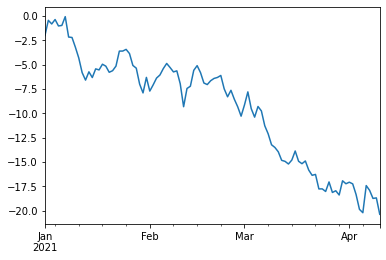

In [2]:
ts = pd.Series(np.random.randn(100), index=pd.date_range("1/1/2021", periods=100))
ts.cumsum().plot()

<AxesSubplot:>

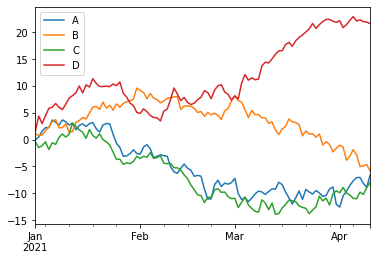

In [3]:
df = pd.DataFrame(np.random.randn(100, 4), index=ts.index, columns=list("ABCD"))
df.cumsum().plot()

<AxesSubplot:xlabel='A'>

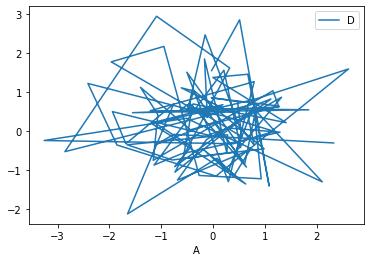

In [4]:
df.plot(x="A", y="D")

## 1.2 Bar Plots

<AxesSubplot:>

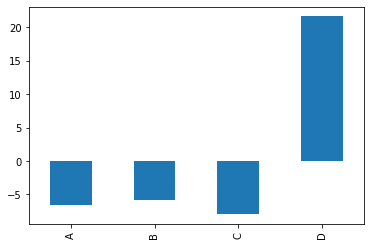

In [5]:
df.sum().plot.bar()

### 1.2.1 Multiple bar plot (default)

<AxesSubplot:>

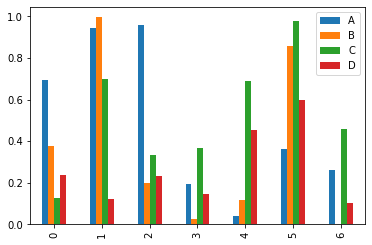

In [6]:
df2 = pd.DataFrame(np.random.rand(7, 4), columns=list("ABCD"))
df2.plot.bar()

### 1.2.2 Stacked bar plots

<AxesSubplot:>

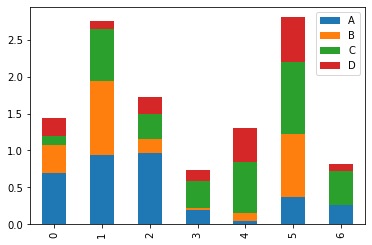

In [7]:
df2.plot.bar(stacked=True)

### 1.2.3 Horizontal bar plots

<AxesSubplot:>

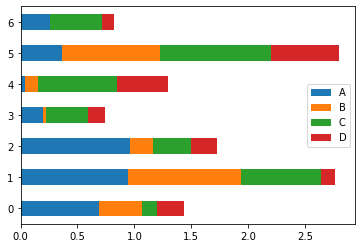

In [8]:
df2.plot.barh(stacked=True)

## 1.3 Histograms

<AxesSubplot:ylabel='Frequency'>

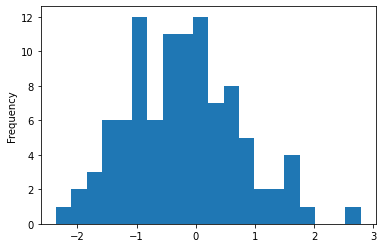

In [9]:
ts.plot.hist(bins=20)

<AxesSubplot:ylabel='Frequency'>

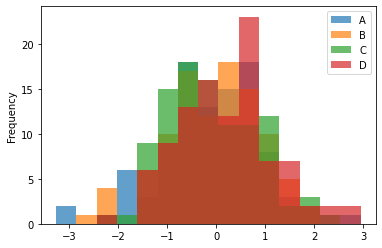

In [10]:
df.plot.hist(alpha=0.7, bins=15)

### 1.3.1 Cumulative histograms

<AxesSubplot:ylabel='Frequency'>

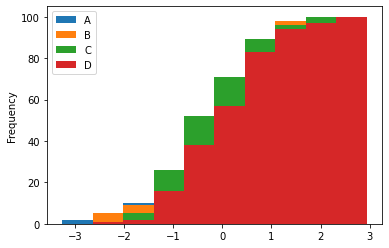

In [11]:
df.plot.hist(cumulative=True)

### 1.3.2 Horizontal histograms

<AxesSubplot:xlabel='Frequency'>

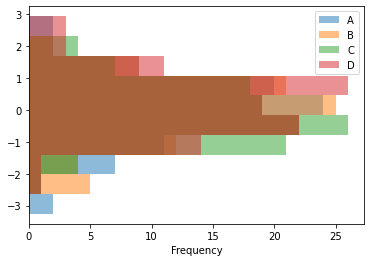

In [12]:
df.plot.hist(orientation='horizontal', alpha=0.5)

### 1.3.3 Multiple histogram subplots

array([[<AxesSubplot:title={'center':'A'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'C'}>,
        <AxesSubplot:title={'center':'D'}>]], dtype=object)

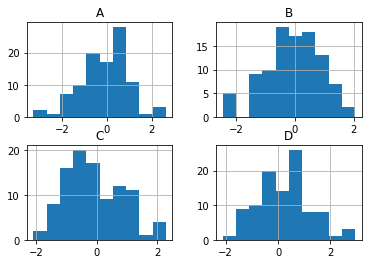

In [13]:
df.hist()

array([<AxesSubplot:title={'center':'X'}>,
       <AxesSubplot:title={'center':'Y'}>], dtype=object)

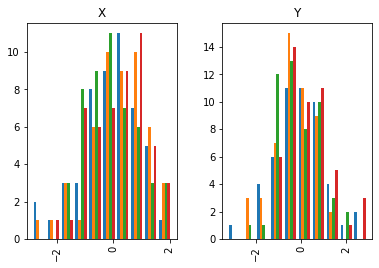

In [14]:
df["E"] = ["X", "Y"] * 50
df.hist(by="E")

## 1.4 Box  plots

<AxesSubplot:>

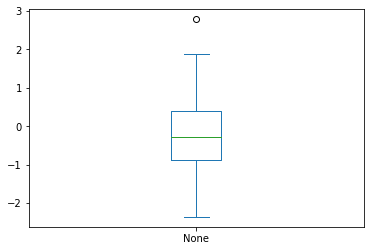

In [15]:
ts.plot.box()

<AxesSubplot:>

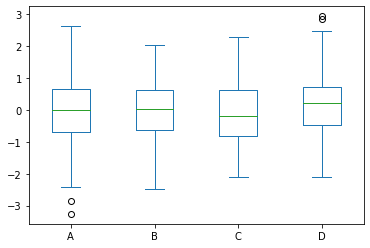

In [16]:
df.plot.box()

<AxesSubplot:>

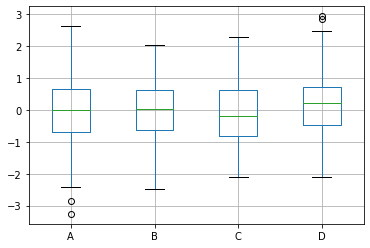

In [17]:
df.boxplot()

### 1.4.1 Horizontal boxplots

<AxesSubplot:>

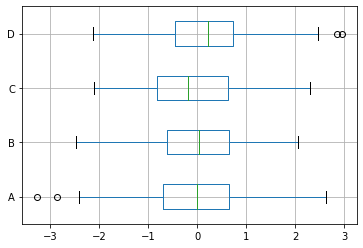

In [18]:
df.boxplot(vert=False)

### 1.4.2 Stratified boxplots 

array([<AxesSubplot:title={'center':'A'}, xlabel='E'>,
       <AxesSubplot:title={'center':'C'}, xlabel='E'>], dtype=object)

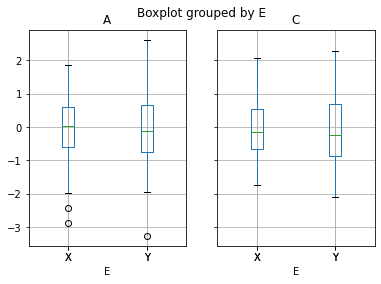

In [19]:
df.boxplot(column=["A", "C"], by="E")

## 1.5 Area plots

<AxesSubplot:>

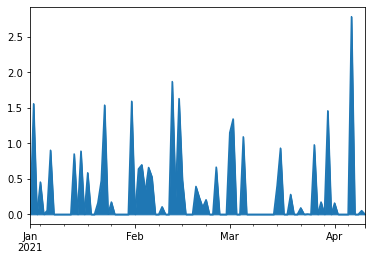

In [20]:
# All values must be either +ve or -ve if stacked=True (default)
ts.clip(lower=0).plot.area()

<AxesSubplot:>

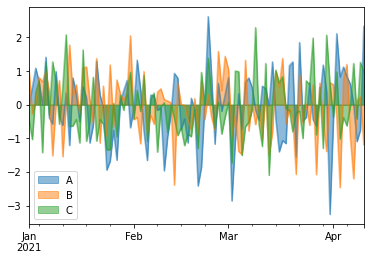

In [21]:
df[["A", "B", "C"]].plot.area(stacked=False)

## 1.6 Scatter plots

<AxesSubplot:xlabel='A', ylabel='D'>

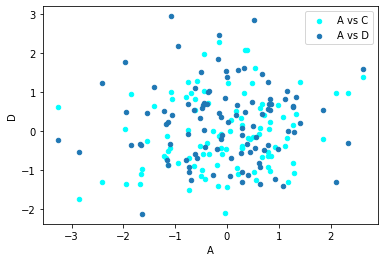

In [22]:
ax = df.plot.scatter(x="A", y="C", color="cyan", label="A vs C")
df.plot(x="A", y="D", kind="scatter", ax=ax, label="A vs D")

### 1.6.1 Color scaling using a column

<AxesSubplot:xlabel='A', ylabel='B'>

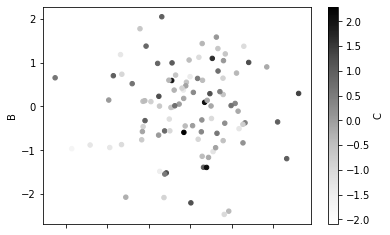

In [23]:
df.plot.scatter(x="A", y="B", c="C")

<AxesSubplot:xlabel='A', ylabel='B'>

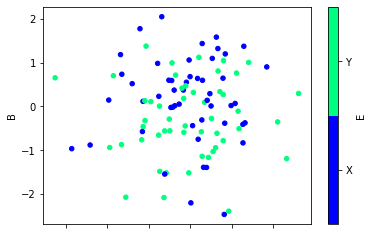

In [24]:
# If a categorical column is passed to c, a discrete colorbar is produced
df["E"] = df["E"].astype("category")
df.plot.scatter(x="A", y="B", c="E", cmap="winter")

### 1.6.2 Setting bubble size

<AxesSubplot:xlabel='A', ylabel='B'>

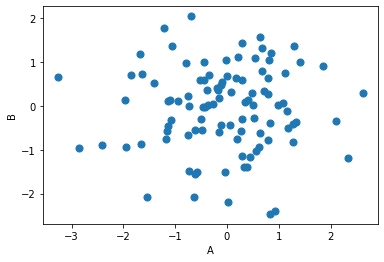

In [25]:
df.plot.scatter(x="A", y="B", s=50)

<AxesSubplot:xlabel='A', ylabel='B'>

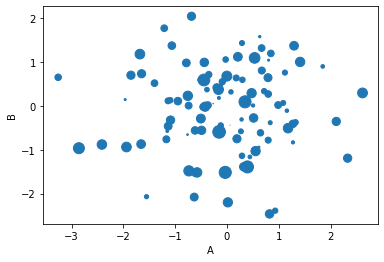

In [26]:
df.plot.scatter(x="A", y="B", s=df["C"].abs() * 70)

## 1.7 Hexagonal bin plots

<AxesSubplot:xlabel='A', ylabel='B'>

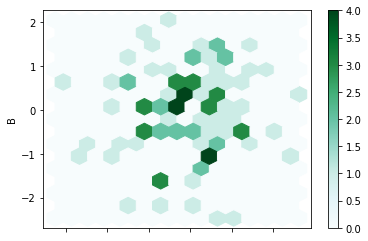

In [27]:
df.plot.hexbin(x="A", y="B", gridsize=15)

### 1.7.1 Specifying alternate aggregating functions

<AxesSubplot:xlabel='A', ylabel='B'>

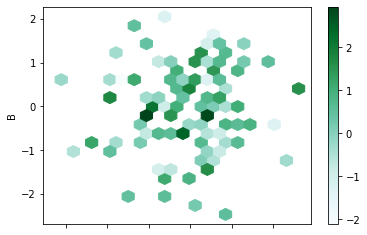

In [28]:
# min, sum, mean, ...
df.plot.hexbin(x="A", y="B", C="D", reduce_C_function=np.max, gridsize=20)

## 1.8 Pie plots

<AxesSubplot:ylabel='Daily Output'>

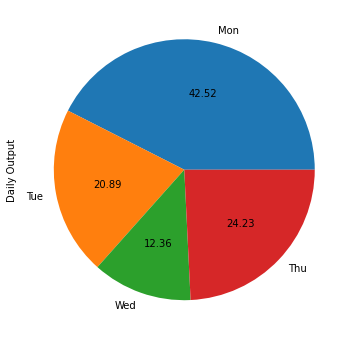

In [29]:
series = pd.Series(
    [344, 169, 100, 196], index=["Mon", "Tue", "Wed", "Thu"], name="Daily Output"
)
series.plot.pie(autopct="%.2f", figsize=(6, 6))

array([<AxesSubplot:ylabel='X'>, <AxesSubplot:ylabel='Y'>], dtype=object)

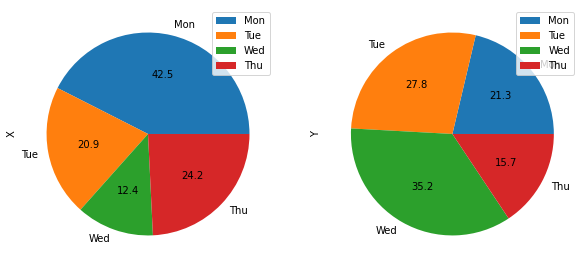

In [30]:
df2 = pd.DataFrame(
    {"X": series, "Y": [49, 64, 81, 36]}, index=["Mon", "Tue", "Wed", "Thu"]
)

df2.plot.pie(subplots=True, figsize=(10, 5), autopct="%.1f")

# 2. Handling Missing Data

Missing values are dropped, left out, or filled depending on the plot type.

| Plot Type      | NaN Handling            |
|:---------------|:------------------------|
| Line           | Leave gaps at NaNs      |
| Line (stacked) | Fill 0’s                |
| Bar            | Fill 0’s                |
| Scatter        | Drop NaNs               |
| Histogram      | Drop NaNs (column-wise) |
| Box            | Drop NaNs (column-wise) |
| Area           | Fill 0’s                |
| KDE            | Drop NaNs (column-wise) |
| Hexbin         | Drop NaNs               |
| Pie            | Fill 0’s                |


# 3. Plotting Tools

## 3.1 Scatter matrix

array([[<AxesSubplot:xlabel='A', ylabel='A'>,
        <AxesSubplot:xlabel='B', ylabel='A'>,
        <AxesSubplot:xlabel='C', ylabel='A'>,
        <AxesSubplot:xlabel='D', ylabel='A'>],
       [<AxesSubplot:xlabel='A', ylabel='B'>,
        <AxesSubplot:xlabel='B', ylabel='B'>,
        <AxesSubplot:xlabel='C', ylabel='B'>,
        <AxesSubplot:xlabel='D', ylabel='B'>],
       [<AxesSubplot:xlabel='A', ylabel='C'>,
        <AxesSubplot:xlabel='B', ylabel='C'>,
        <AxesSubplot:xlabel='C', ylabel='C'>,
        <AxesSubplot:xlabel='D', ylabel='C'>],
       [<AxesSubplot:xlabel='A', ylabel='D'>,
        <AxesSubplot:xlabel='B', ylabel='D'>,
        <AxesSubplot:xlabel='C', ylabel='D'>,
        <AxesSubplot:xlabel='D', ylabel='D'>]], dtype=object)

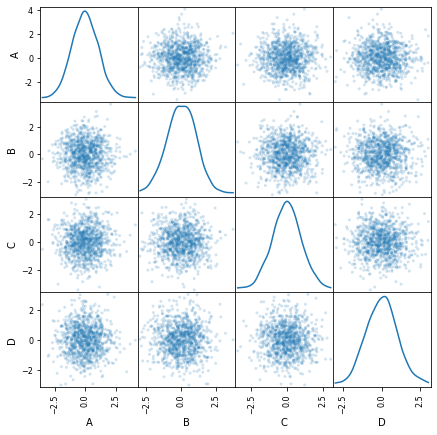

In [31]:
from pandas.plotting import scatter_matrix

df = pd.DataFrame(np.random.randn(1000, 4), columns=["A", "B", "C", "D"])
scatter_matrix(df, alpha=0.2, diagonal="kde", figsize=(7, 7))

array([[<AxesSubplot:xlabel='A', ylabel='A'>,
        <AxesSubplot:xlabel='B', ylabel='A'>,
        <AxesSubplot:xlabel='C', ylabel='A'>,
        <AxesSubplot:xlabel='D', ylabel='A'>],
       [<AxesSubplot:xlabel='A', ylabel='B'>,
        <AxesSubplot:xlabel='B', ylabel='B'>,
        <AxesSubplot:xlabel='C', ylabel='B'>,
        <AxesSubplot:xlabel='D', ylabel='B'>],
       [<AxesSubplot:xlabel='A', ylabel='C'>,
        <AxesSubplot:xlabel='B', ylabel='C'>,
        <AxesSubplot:xlabel='C', ylabel='C'>,
        <AxesSubplot:xlabel='D', ylabel='C'>],
       [<AxesSubplot:xlabel='A', ylabel='D'>,
        <AxesSubplot:xlabel='B', ylabel='D'>,
        <AxesSubplot:xlabel='C', ylabel='D'>,
        <AxesSubplot:xlabel='D', ylabel='D'>]], dtype=object)

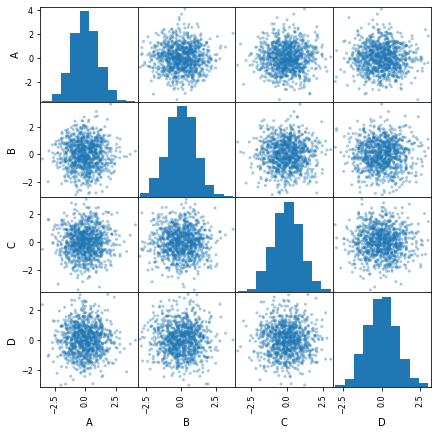

In [32]:
scatter_matrix(df, alpha=0.4, figsize=(7, 7), diagonal="hist")

## 3.2 Density plot

<AxesSubplot:ylabel='Density'>

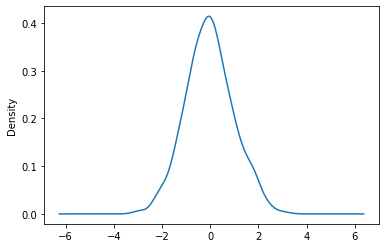

In [33]:
s = pd.Series(np.random.randn(1000))
s.plot.kde()

<AxesSubplot:ylabel='Density'>

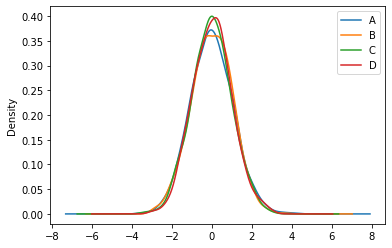

In [34]:
df.plot.kde()

## 3.3 Andrew curves

In [35]:
from pandas.plotting import andrews_curves

iris_data = pd.read_csv("../data/iris.csv")
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:>

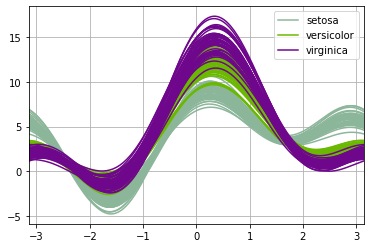

In [36]:
andrews_curves(iris_data, "species")

## 3.4 Parallel coordinates

<AxesSubplot:>

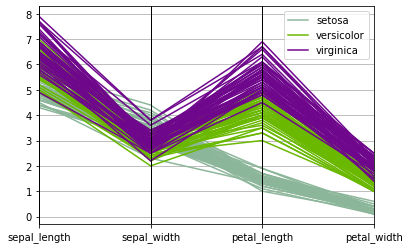

In [37]:
from pandas.plotting import parallel_coordinates


parallel_coordinates(iris_data, "species")

## 3.5 Lag plot

Lag plots are used to check if a data set or time series is random. Random data should not exhibit any structure in the lag plot.

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

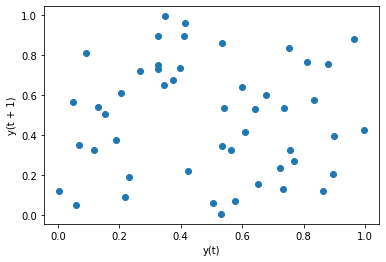

In [38]:
from pandas.plotting import lag_plot

s = pd.Series(np.random.rand(50))
lag_plot(s)

## 3.6 Autocorrelation plots

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

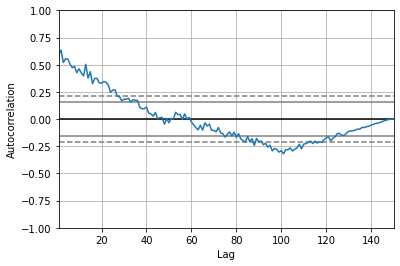

In [39]:
from pandas.plotting import autocorrelation_plot

s = pd.Series(iris_data["sepal_length"])
autocorrelation_plot(s)

## 3.7 Bootstrap plot

The bootstrap plot is used to estimate the uncertainty of a statistic
through random sampling with replacement.

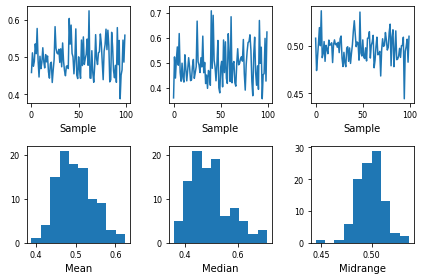

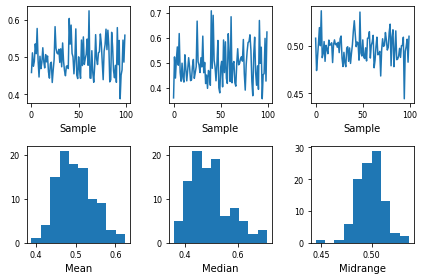

In [40]:
from pandas.plotting import bootstrap_plot

s = pd.Series(np.random.rand(1000))
bootstrap_plot(s, size=50, samples=100)

## 3.8 RadViz

Plots a multidimensional dataset in 2D. Each `Series` in a `DataFrame` is represented as a evenly distributed slice on a circle, with each data point rendered according to its value. Highly correlated `Series` in the `DataFrame` are placed closer on the unit circle.

<AxesSubplot:>

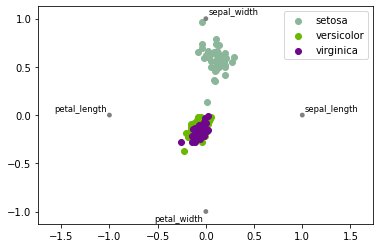

In [41]:
from pandas.plotting import radviz

radviz(iris_data, "species")

# 4. Plot Formatting

## 4.1 Setting plot style

In [42]:
import matplotlib
matplotlib.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

<AxesSubplot:>

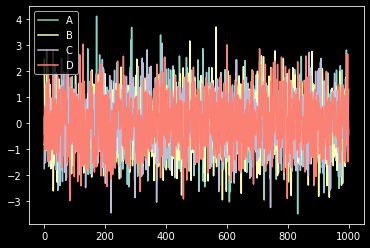

In [43]:
matplotlib.style.use("dark_background")
df.plot()

<AxesSubplot:>

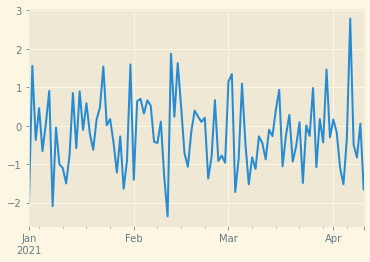

In [44]:
matplotlib.style.use("Solarize_Light2")
ts.plot()

## 4.2 General plot style arguments

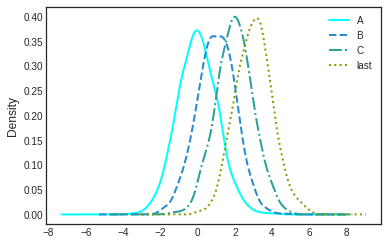

In [45]:
matplotlib.style.use("seaborn-white")
df.A.plot(style="-", kind="kde", color="cyan")  # solid line
(df.B + 1).plot(style="--", kind="kde")  # dashed line
(df.C + 2).plot(style="-.", kind="kde")  # dash-dotted line
(df.D + 3).plot(style=":", kind="kde", label="last")  # dotted line
plt.legend()

## 4.3 Controlling the labels

<AxesSubplot:xlabel='X axis', ylabel='Y axis'>

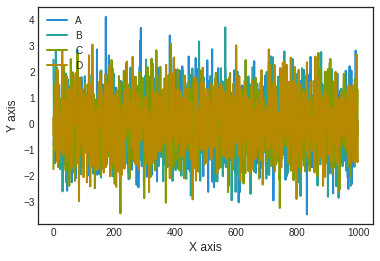

In [46]:
df.plot(xlabel="X axis", ylabel="Y axis")

## 4.4 Scales

<AxesSubplot:>

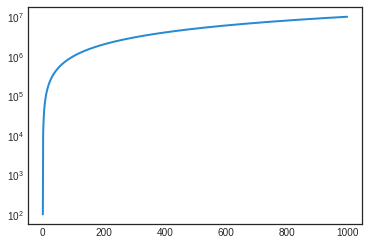

In [47]:
# log scale on y-axis
s = pd.Series(range(100, 10 ** 7, 10 ** 4))
s.plot(logy=True)

<AxesSubplot:>

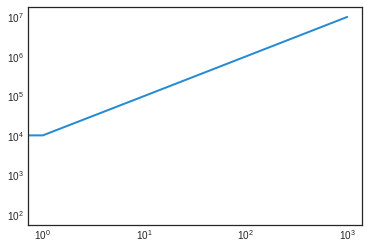

In [48]:
# log scale on both axes
s.plot(logy=True, logx=True)

## 4.5 Plotting on a secondary y-axis

<AxesSubplot:>

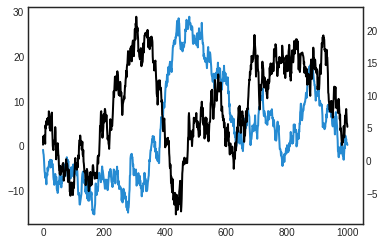

In [49]:
df = df.cumsum()
df["A"].plot()
df["B"].plot(secondary_y=True, style="k")

Text(0, 0.5, 'A-B Scale')

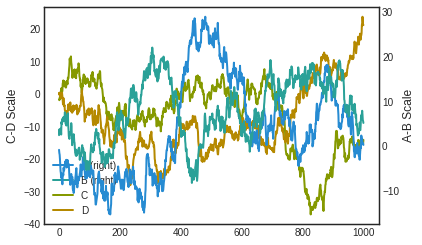

In [50]:
ax = df.plot(secondary_y=["A", "B"])
ax.set_ylabel("C-D Scale")
ax.right_ax.set_ylabel("A-B Scale")

## 4.6 Subplots

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

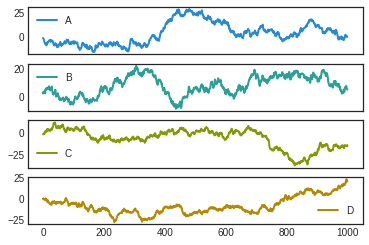

In [51]:
df.plot(subplots=True)

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

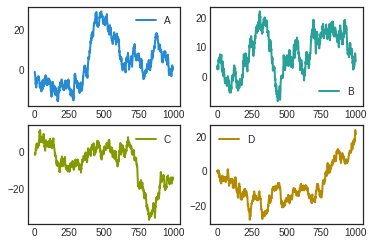

In [52]:
df.plot(subplots=True, layout=(2, -1), sharex=False)

## 4.7 Plotting Tables

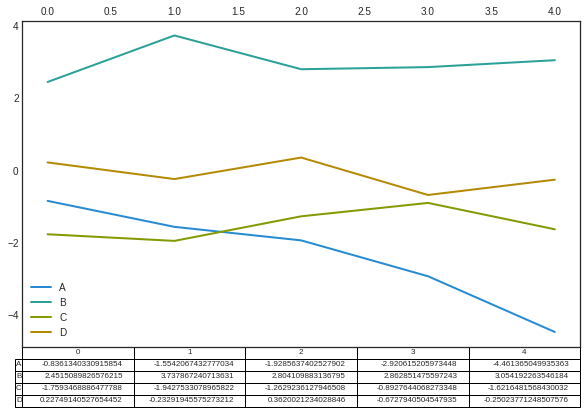

In [53]:
ax = df.head().plot(table=True, figsize=(10, 6))
ax.xaxis.tick_top()  # display x-ticks on top

<AxesSubplot:>

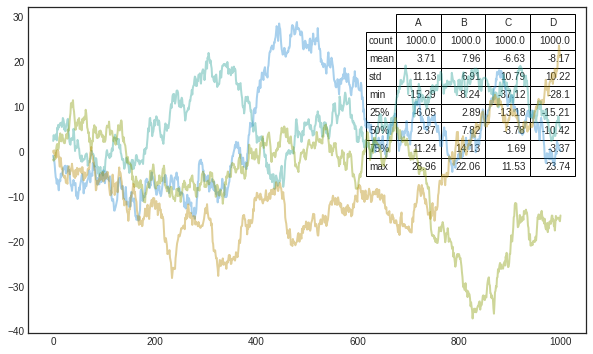

In [54]:
from pandas.plotting import table

# adding a table to axes
fig, ax = plt.subplots(1, 1)
table(ax, df.describe().round(2), loc="upper right", colWidths=[0.08] * 4)
df.plot(ax=ax, alpha=0.4, figsize=(10, 6), legend=None)

## 4.8 Color Maps

| Perceptually Uniform Sequential   | Sequential   | Sequential (2)   | Diverging   | Cyclic           | Qualitative   | Miscellaneous   |
|:----------------------------------|:-------------|:-----------------|:------------|:-----------------|:--------------|:----------------|
| viridis                           | Greys        | binary           | PiYG        | twilight         | Pastel1       | flag            |
| plasma                            | Purples      | gist_yarg        | PRGn        | twilight_shifted | Pastel2       | prism           |
| inferno                           | Blues        | gist_gray        | BrBG        | hsv              | Paired        | ocean           |
| magma                             | Greens       | gray             | PuOr        |               | Accent        | gist_earth      |
| cividis                           | Oranges      | bone             | RdGy        |               | Dark2         | terrain         |
|                                | Reds         | pink             | RdBu        |               | Set1          | gist_stern      |
|                                | YlOrBr       | spring           | RdYlBu      |               | Set2          | gnuplot         |
|                                | YlOrRd       | summer           | RdYlGn      |               | Set3          | gnuplot2        |
|                                | OrRd         | autumn           | Spectral    |               | tab10         | CMRmap          |
|                                | PuRd         | winter           | coolwarm    |               | tab20         | cubehelix       |
|                                | RdPu         | cool             | bwr         |               | tab20b        | brg             |
|                                | BuPu         | Wistia           | seismic     |               | tab20c        | gist_rainbow    |
|                                | GnBu         | hot              |          |               |            | rainbow         |
|                                | PuBu         | afmhot           |          |               |            | jet             |
|                                | YlGnBu       | gist_heat        |          |               |            | nipy_spectral   |
|                                | PuBuGn       | copper           |          |               |            | gist_ncar       |
|                                | BuGn         |               |          |               |            |              |
|                                | YlGn         |               |          |               |            |              |



<AxesSubplot:>

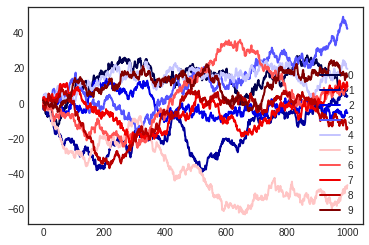

In [55]:
df = pd.DataFrame(np.random.randn(1000, 10)).cumsum()
df.plot(colormap="seismic")